# Кластеризация qRS комплексов в ЭКГ

## Общий вид цикла

<img src="./images/SinusRhythmLabels.png">

## Экстрасистола тип 1

<img src="./images/vebs.jpg">

## Экстрасистола тип 2

<img src="./images/Ventricular-extrasystole-ECG.jpg">

# Задание

Используя алгоритмы кластеризации разделить qRS комплесы ЭКГ на группы, схожие по форме.
Данные представлены в файлах:
* ecg1_samples.csv
* ecg2_samples.csv

# Решение

## Загружаем данные

In [867]:
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from typing import Tuple, List

%matplotlib inline

In [868]:
X1 = np.loadtxt('./ds/ecg2_samples.csv')

X1.shape

(3037, 140)

In [869]:
X1

array([[-0.02211, -0.0147 , -0.01266, ...,  0.5106 ,  0.49545,  0.47199],
       [-0.11145, -0.1062 , -0.10871, ..., -0.0808 , -0.08287, -0.08434],
       [ 0.12544,  0.12735,  0.13848, ...,  0.54598,  0.52075,  0.50307],
       ...,
       [-0.02078, -0.01972, -0.02556, ..., -0.03822, -0.03501, -0.03674],
       [ 0.15453,  0.14507,  0.13675, ...,  0.44602,  0.44811,  0.44325],
       [-0.10865, -0.10322, -0.10616, ..., -0.08216, -0.07675, -0.08109]])

In [870]:
X2 = np.loadtxt('./ds/ecg1_samples.csv')

X2.shape

(2420, 140)

In [871]:
X2

array([[ 0.23081,  0.24298,  0.25117, ...,  0.19396,  0.21207,  0.21228],
       [ 0.17868,  0.18605,  0.20168, ...,  0.18001,  0.18377,  0.17958],
       [-0.02735, -0.0225 , -0.03509, ...,  0.10906,  0.10302,  0.09643],
       ...,
       [-0.02662, -0.01956, -0.00955, ...,  0.12895,  0.12308,  0.10431],
       [-0.05428, -0.04011, -0.026  , ...,  0.16597,  0.1586 ,  0.14288],
       [-0.02252, -0.03238, -0.04729, ...,  0.11562,  0.12176,  0.12567]])

In [872]:
X = np.concat([X1, X2])

X.shape

(5457, 140)

In [873]:
X

array([[-0.02211, -0.0147 , -0.01266, ...,  0.5106 ,  0.49545,  0.47199],
       [-0.11145, -0.1062 , -0.10871, ..., -0.0808 , -0.08287, -0.08434],
       [ 0.12544,  0.12735,  0.13848, ...,  0.54598,  0.52075,  0.50307],
       ...,
       [-0.02662, -0.01956, -0.00955, ...,  0.12895,  0.12308,  0.10431],
       [-0.05428, -0.04011, -0.026  , ...,  0.16597,  0.1586 ,  0.14288],
       [-0.02252, -0.03238, -0.04729, ...,  0.11562,  0.12176,  0.12567]])

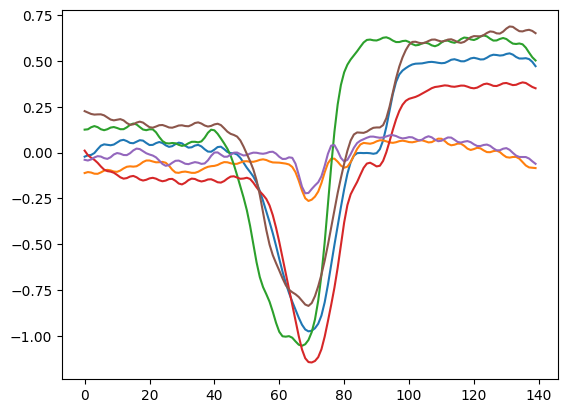

In [874]:
sample_x = X[np.random.randint(0, len(X), 6)]

for i in range((len(sample_x))):
    plt.plot(X[i])

plt.show()

## Определяем общие параметры

In [875]:
def get_flors_rooms(length: int) -> Tuple[int, int]:
    return (
        math.ceil(length / 2),
        2 if length % 2 == 0 else 1
    )


def display_ekg(labels: np.ndarray, colors: List[int]):
    labels_indice = []
    for i in colors:
        labels_indice.append((i, np.arange(len(labels))[labels == i]))
    
    fig_size_h, _ = get_flors_rooms(len(labels_indice))
    fig, axs = plt.subplots(
        fig_size_h,
        2,
        sharex=True,
        sharey=True
    )
    fig.set_figwidth(20)
    fig.set_figheight(fig_size_h*5)

    for l, indices in labels_indice:
        ax_y, ax_x = get_flors_rooms(l)
        labels_x = X[indices]

        for i in range(len(labels_x)):
            axs[ax_y - 1, ax_x - 1].plot(
                labels_x[i]
            )

    plt.show()

## MiniBatchKMeans

In [876]:
from sklearn.cluster import MiniBatchKMeans

In [877]:
clusters_id = list(range(6))

In [878]:
kmeans = MiniBatchKMeans(init='k-means++', n_clusters=len(clusters_id), random_state=0)
labels = kmeans.fit_predict(X)

In [879]:
labels.shape

(5457,)

In [880]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=int32)

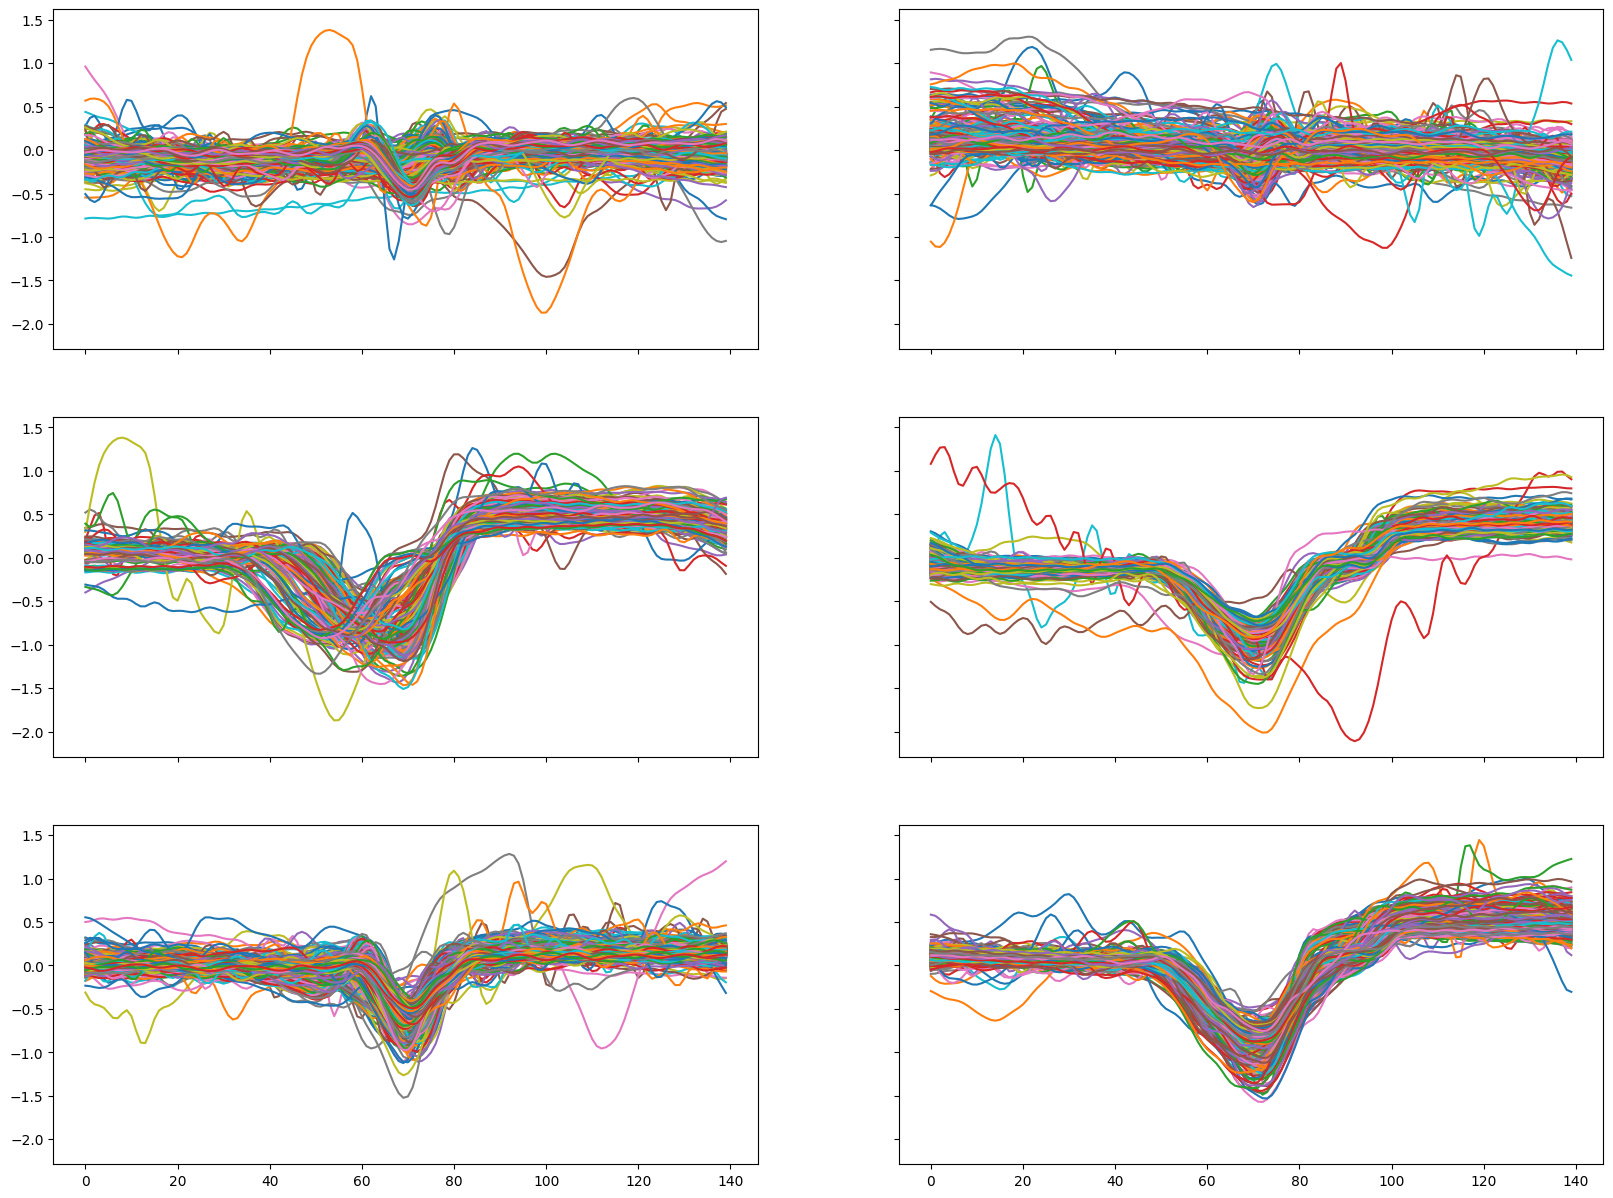

In [881]:
display_ekg(labels, clusters_id)

## KMeans++

In [882]:
from sklearn.cluster import KMeans

In [883]:
clusters_id = list(range(6))

In [884]:
kmeans_plus = KMeans(init='k-means++', n_clusters=len(clusters_id), random_state=0)
labels = kmeans_plus.fit_predict(X)

In [885]:
labels.shape

(5457,)

In [886]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=int32)

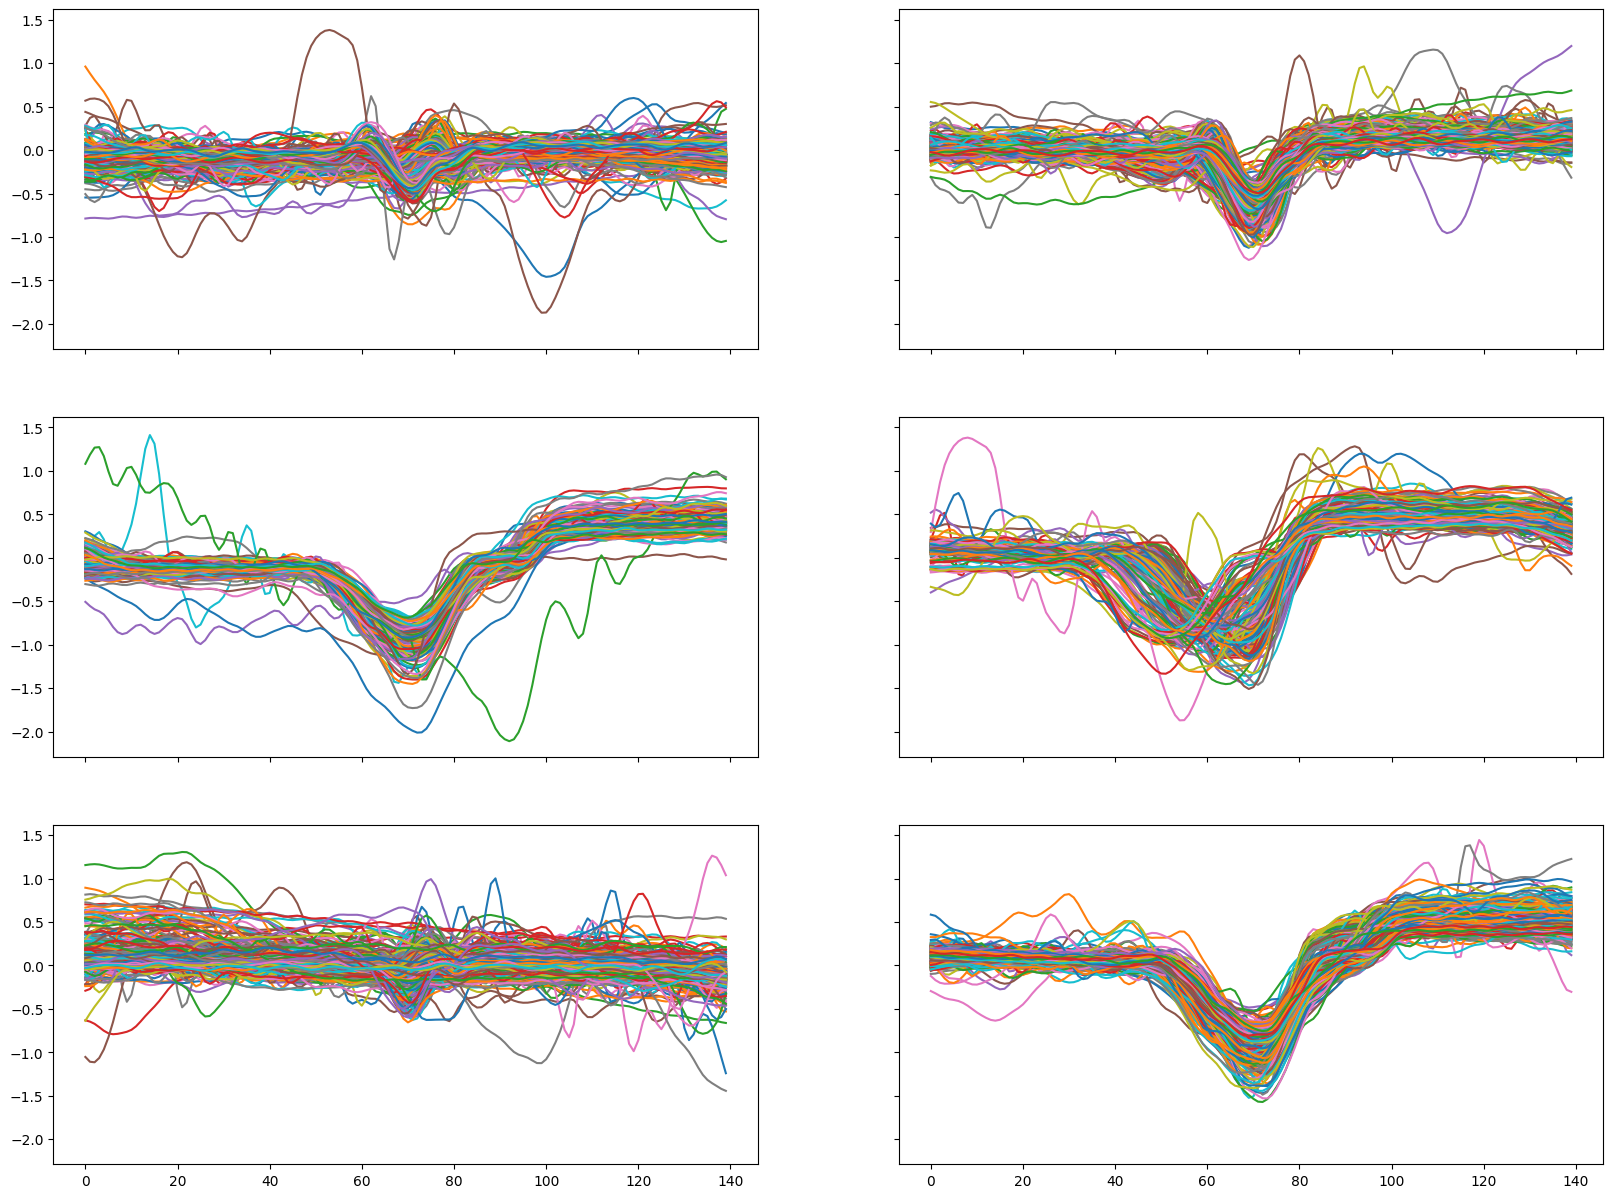

In [887]:
display_ekg(labels, clusters_id)

## DBSCAN

In [888]:
from sklearn.cluster import DBSCAN

In [889]:
dbscan = DBSCAN(eps=0.8)
labels = dbscan.fit_predict(X) + 1

In [890]:
labels.shape

(5457,)

In [891]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

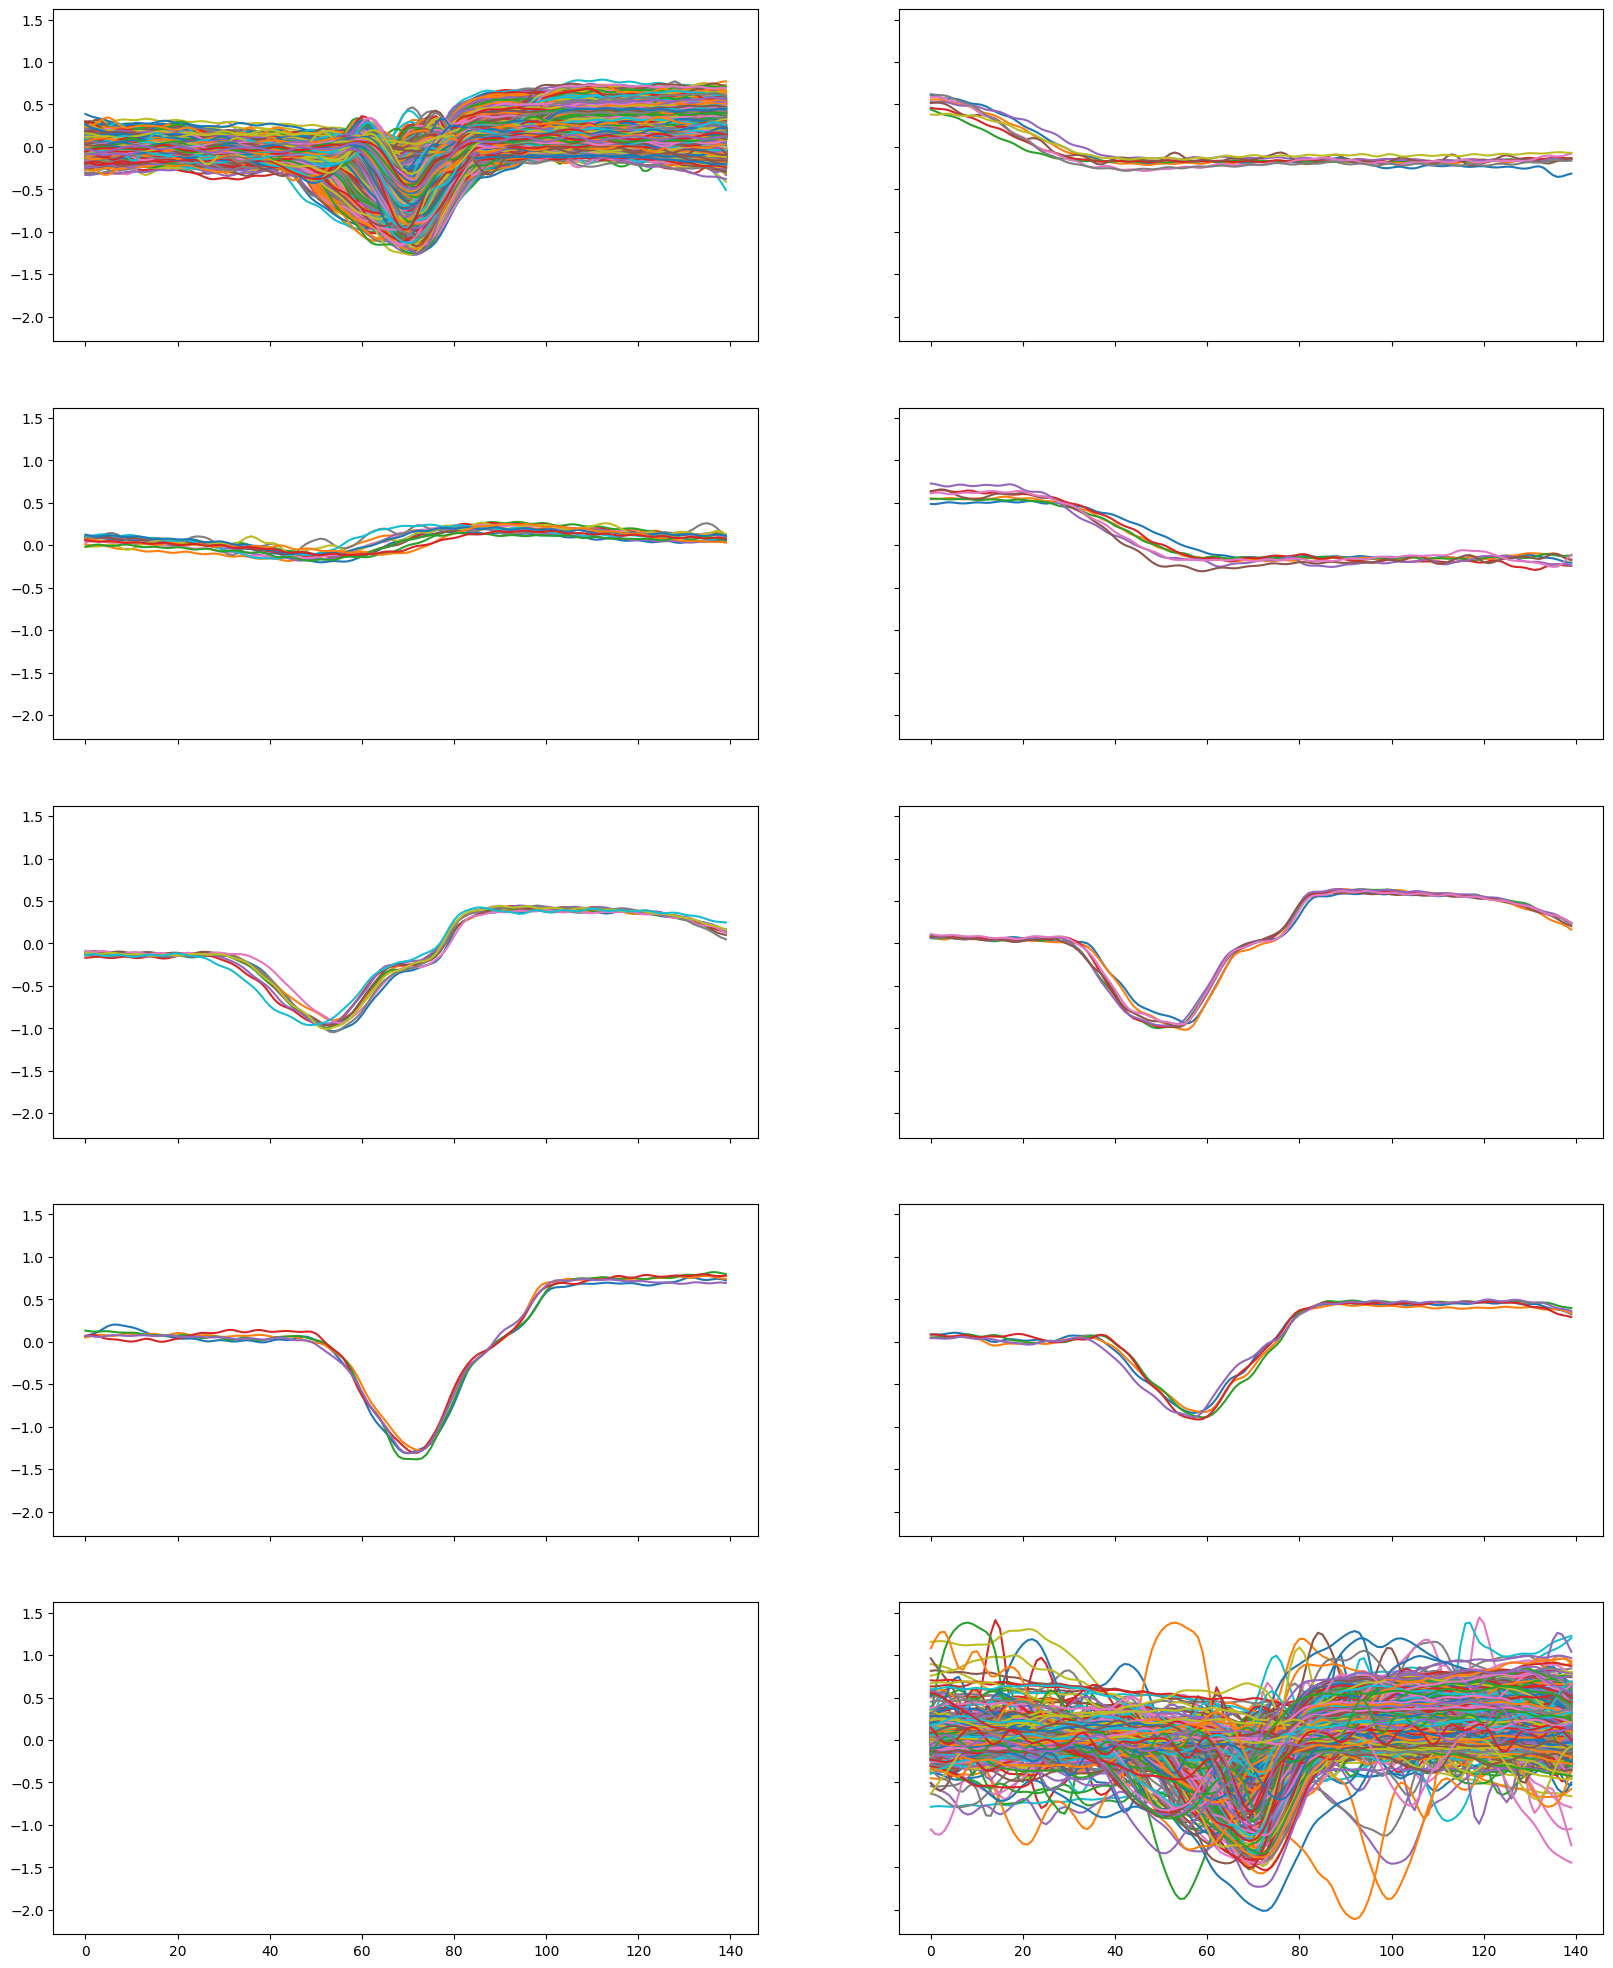

In [892]:
display_ekg(labels, np.unique(labels).tolist())

## AgglomerativeClustering

In [893]:
from sklearn.cluster import AgglomerativeClustering

In [894]:
clusters_id = list(range(6))

In [895]:
agg_clust = AgglomerativeClustering(n_clusters=len(clusters_id))
labels = agg_clust.fit_predict(X)

In [896]:
labels.shape

(5457,)

In [897]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5])

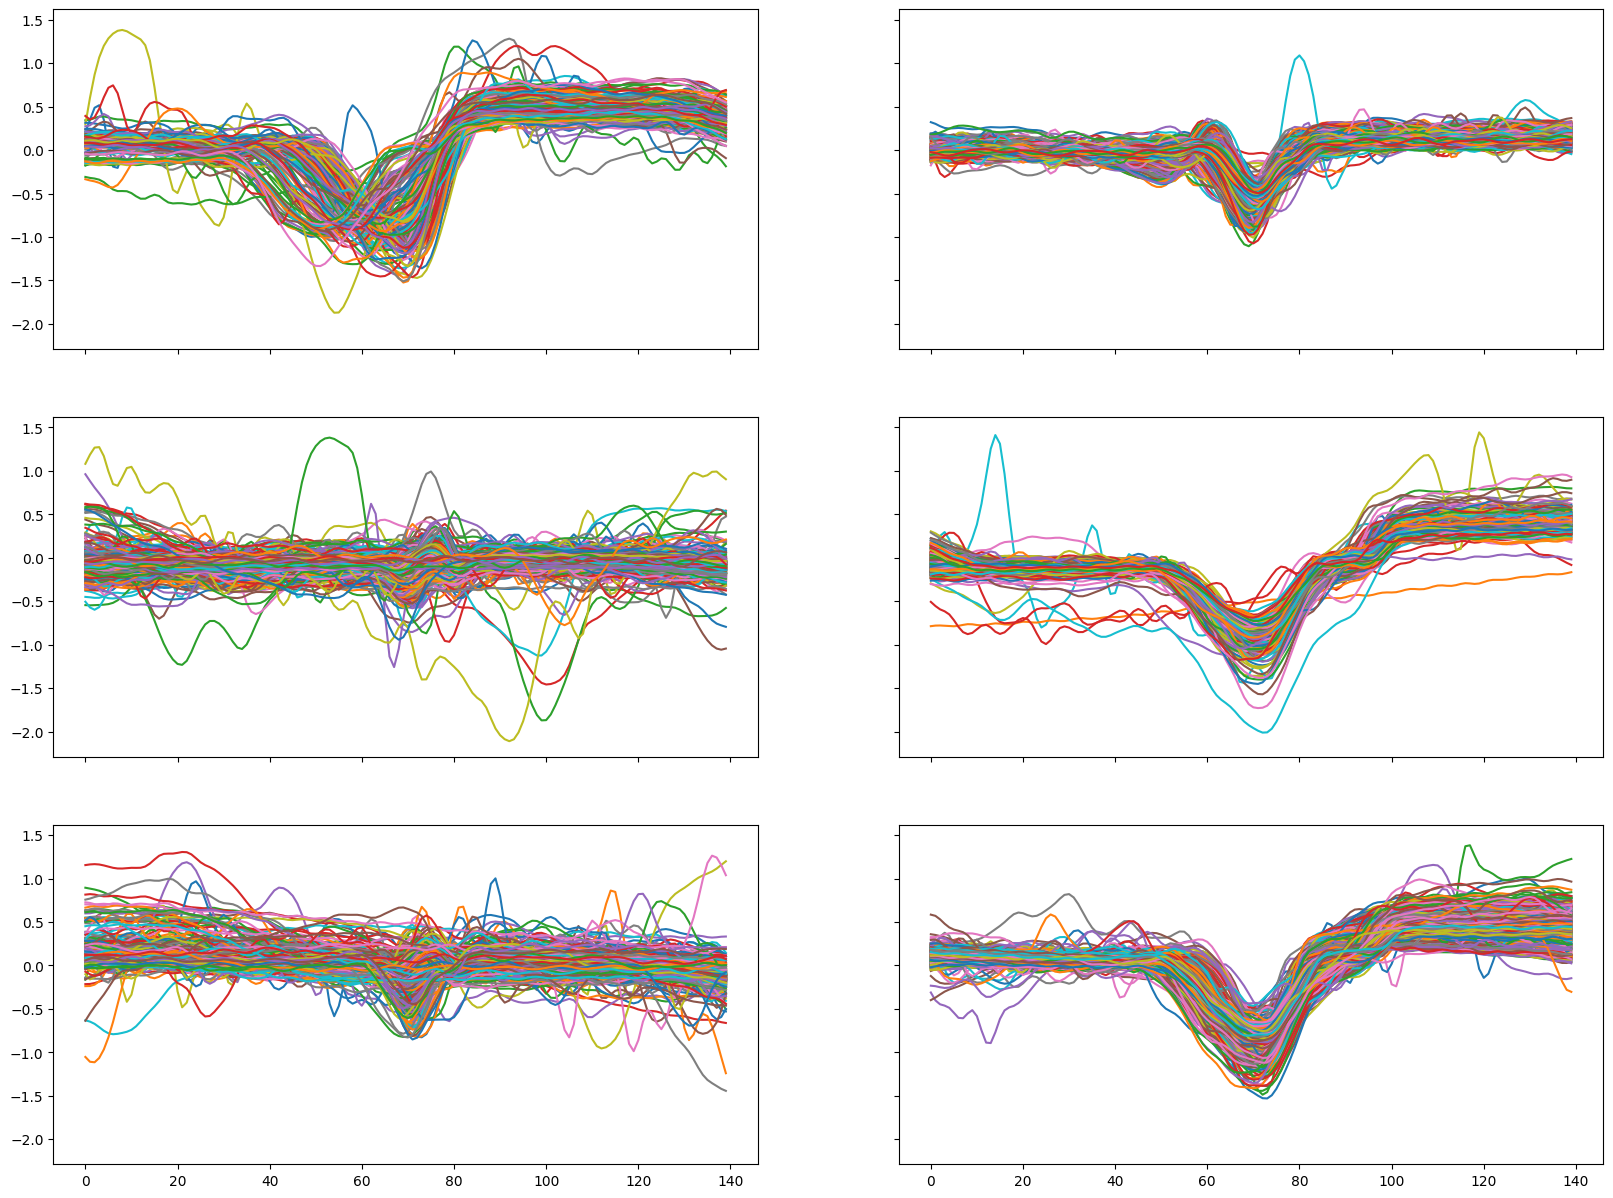

In [898]:
display_ekg(labels, clusters_id)

# Результаты

## DBSCAN
Cлишком сильно концентрируется на "локальных" различиях, из-за чего выделяет несколько класетров c **очень** близкими данными, остальные же данные попадают в один из двух класетров.

Модель не способна выделять данные по глобальным различиям. Для нашей задачи я бы не стал использовать подобную модель

## AgglomerativeClustering
Модель достаточно неплохо разделяет данные, но например в кластере 0 попали два явных "пучка" данных, при увеличении количества кластеров, эта проблема не исчезла.

Модель неплоха, но есть модели, показывающие более хороший результат.

## KMeans
Обе модели показали похожий рузельтат (что не удивительно), при большом разбросе данных в каждом кластере, на глобальном уровне данные похожи.

На относительно небольших датасетах (как у нас) Kmeans работает быстрее, чем MiniBatchKmeans, что видно из нашей же работы.

## Выводы
Для данного датасета я бы отдал предпочтение модели Kmeans